<a href="https://colab.research.google.com/github/DrAlexSanz/MC-calculations/blob/main/Lottery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estimate the probability of winning the lottery
### Or at least estimate the probability of winning something in the lottery

First calculate the expectancy. And later do a simulation to see if it holds.

## Lottery = Lotería de Navidad.

I'm doing this analysis based on tenths of numbers, which is what everyone buys. Source is in Wikipedia: [Lotería de Navidad](https://es.wikipedia.org/wiki/Sorteo_Extraordinario_de_Navidad#Premios)



The mathematical expectation is 14 euros. Considering that you pay 20 euros to play, that's not a good game for you. Calculations are here: [Expected win](https://github.com/DrAlexSanz/MC-calculations/blob/main/expectation.xlsx)

Now, let's check this. If I generate a thousand or a million lottery draws I should be able to reproduce the results and keep track of the gains.

* I will always play the same number, because many people do and I save a random generation.
* I will generate a random number to calculate the prizes that I get and see the accumulated value.

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import randint
from random import seed # To reproduce later


In [2]:
# Check that I can generate random numbers
seed(13)
print(randint(0, 99999), randint(0, 99999), randint(0, 99999), randint(0, 99999))

33948 38110 89818 89663


In [3]:
my_number = 17069 # This is 13*1313

In [120]:
# Do the loop of 1000 lottery draws (10 for speed)
# Then compare my number and see if I win anything.

n_draws = 100
earnings = np.zeros(n_draws)
ticket_price = 20

array_spent = np.full_like(a = earnings, fill_value = ticket_price)

list_k = []

for i in range(n_draws):
    gordo = randint(0, 99999)
    second = randint(0, 99999)
    third = randint(0, 99999)
    fourth = [randint(0, 99999) for k in range(2)] # do the multiple prizes as lists
    fifth = [randint(0, 99999) for k in range(8)]
    pedrea = [randint(0, 99999) for k in range(1794)]

    # And now the special prizes: Next numbers to the main prizes
    app_gordo = [gordo - 1, gordo + 1] # Gordo +/-1
    app_second = [second - 1, second + 1] # Second +/-1
    app_third = [third - 1, third + 1] # Third +/-1

    # Matching the first 3 digits of main prizes
    last_2_dig = [str(x) for x in range(100)]
    first_3_dig_gordo = str(gordo // 100)
    first_3_dig_second = str(second // 100)
    first_3_dig_third = str(third // 100)
    first_3_dig_fourth = [str(x // 100) for x in fourth]

    hundredth_gordo = [first_3_dig_gordo + x for x in last_2_dig]
    # At this moment I don't care if I repeat a prize (gordo + hundredth of gordo) because the amount is negligible compared to the gordo.
    # According to wikipedia it seems like you can win more than a prize with the same number. So reintegro + gordo or something is possible. I will assume that it's possible.
    # However, this overestimates my earnings if I win something

    #hundredth_gordo = [x for x in hundredth_gordo if x not in gordo]


    hundredth_second = [int(first_3_dig_second + x) for x in last_2_dig]
    
    hundredth_third = [int(first_3_dig_third + x) for x in last_2_dig]

    # There are 2 fourth prizes so I have to do it in a list
    for j in first_3_dig_fourth:
        list_k.append([int(j + x) for x in last_2_dig])

    hundredth_fourth = list(np.concatenate(list_k))
    list_k = [] # Clean after concatenating

    first_3_dig = [str(x) for x in range(1000)]
    first_3_dig_gordo = str(gordo // 100)
    first_3_dig_second = str(second // 100)
    first_3_dig_third = str(third // 100)
    first_3_dig_fourth = [str(x // 100) for x in fourth]

    # Matching the last 2 digits of main prizes
    #l2_gordo = [randint(0, 99999) for k in range(999)] # Last 2 digits of Gordo
    l2_second = [randint(0, 99999) for k in range(999)] # Last 2 digits of Second
    l2_third = [randint(0, 99999) for k in range(999)] # Last 2 digits of Third

    # Reintegro: Money back if you match the last digit of the Gordo
    reintegro = [randint(0, 99999) for k in range(9999)] # Last digit of Gordo

    if my_number == gordo:
        earnings[i] = 400000 # Win the gordo
    
    if my_number == second:
        earnings[i] = 125000 # Win the second

    if my_number == third:
        earnings[i] = 50000 # Win the third

    # I won't bother with a function to do the comparison with minor prizes. It's more work than copy/paste for this.
    if any(my_number == x for x in fourth): # Compare with each of the drawn numbers for the fourth prize
        earnings[i] = 20000

    if any(my_number == x for x in fifth):
        earnings[i] = 6000

    if any(my_number == x for x in pedrea):
        earnings[i] = 100

    if any(my_number == x for x in app_gordo):
        earnings[i] = 2000

    if any(my_number == x for x in app_second):
        earnings[i] = 1250

    if any(my_number == x for x in app_third):
        earnings[i] = 960

    if any(my_number == x for x in hundredth_gordo):
        earnings[i] = 100

    if any(my_number == x for x in hundredth_second):
        earnings[i] = 100

    if any(my_number == x for x in hundredth_third):
        earnings[i] = 100

    if any(my_number == x for x in hundredth_fourth):
        earnings[i] = 100

    if any(my_number == x for x in l2_gordo):
        earnings[i] = 100

    if any(my_number == x for x in l2_second):
        earnings[i] = 100

    if any(my_number == x for x in l2_third):
        earnings[i] = 100

    if any(my_number == x for x in reintegro):
        earnings[i] = 20

In [121]:
run_earnings = np.cumsum(earnings)
run_spent = np.cumsum(array_spent)
total_spent = np.sum(array_spent)
total_earnings = np.sum(earnings)

print("Total money spent is: ", int(total_spent))
print("Total earnings are: ", int(total_earnings))

Total money spent is:  2000
Total earnings are:  420


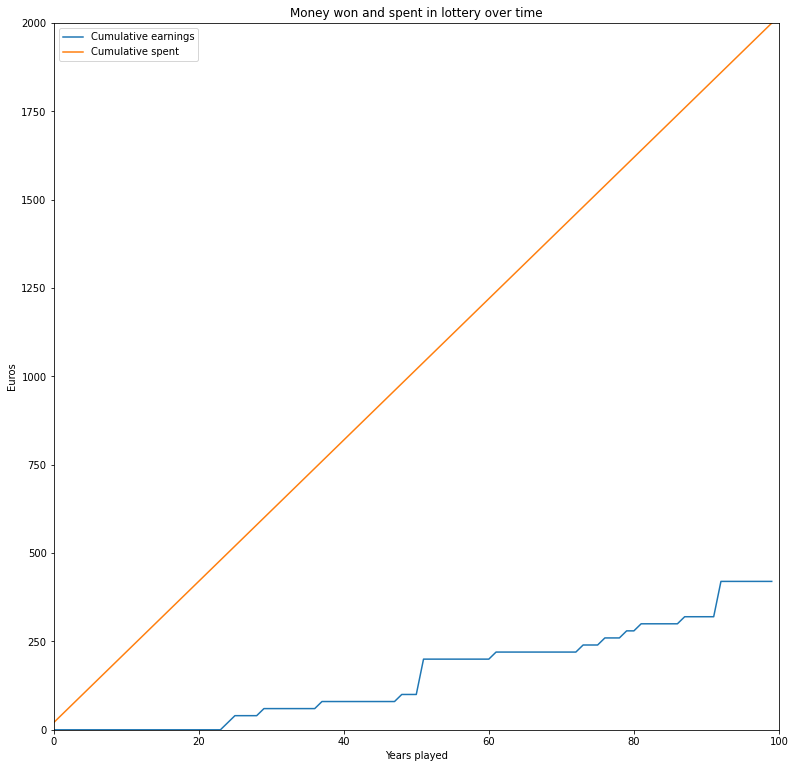

In [122]:
fig = plt.figure(figsize = (13, 13))

plt.plot(run_earnings)
plt.plot(run_spent)
plt.xlim((0, len(run_earnings)))
plt.ylim((0, np.max(run_spent)))
plt.title("Money won and spent in lottery over time")
plt.ylabel("Euros")
plt.xlabel("Years played")
plt.legend(["Cumulative earnings", "Cumulative spent"])
